In [2]:
### imports ###

import requests
import json
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, f_regression, mutual_info_regression
import scipy as sp
import torch as pt
import keras as kr
import tensorflow as tf
import sklearn as sk
import regex as re
import plotly as pl
from bs4 import BeautifulSoup
import ebooklib
from ebooklib import epub
import difflib

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

from requests.exceptions import InvalidSchema

### webdriver / selenium ###

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

import concurrent.futures

# selenium 3
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

# my functions

import thesis_functions as th

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-08-19 18:17:01.857028: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# open og saved files to dataframe

train_wiki_df = pd.read_json('train_wiki_df.json', orient='records', lines=True)

test_wiki_df = pd.read_json('test_wiki_df.json', orient='records', lines=True)

In [35]:
# open trial 2 files to dataframe

wiki_2_train = pd.read_json('wiki_2_train.json', orient='records', lines=True)
wiki_2_test = pd.read_json('wiki_2_test.json', orient='records', lines=True)

In [48]:
print(wiki_2_train.shape)

(910234, 2)


In [41]:
wiki_3_train = pd.read_json('wiki_3_train.json', orient='records', lines=True)
wiki_3_test = pd.read_json('wiki_3_test.json', orient='records', lines=True)

In [46]:
print(wiki_3_train.shape)

(897042, 2)


In [3]:
wiki_4_train = pd.read_json('archive/wiki_4_train.json', orient='records', lines=True)
wiki_4_test = pd.read_json('archive/wiki_4_test.json', orient='records', lines=True)

In [4]:
print(wiki_4_train.shape)

(784044, 2)


In [5]:
def create_balanced_dataset(df):
    # Group the DataFrame by the 'label' column
    grouped = df.groupby('label')

    # Find the smallest group size
    min_group_size = min(grouped.size())

    # Sample an equal number of rows from each group
    balanced_df = grouped.apply(lambda x: x.sample(min_group_size)).reset_index(drop=True)

    return balanced_df


In [6]:
# balanced_wiki_train_df = create_balanced_dataset(train_wiki_df)
# balanced_wiki_test_df = create_balanced_dataset(test_wiki_df)

# balanced_wiki_train_df = create_balanced_dataset(wiki_2_train)
# balanced_wiki_test_df = create_balanced_dataset(wiki_2_test)

# balanced_wiki_train_df = create_balanced_dataset(wiki_3_train)
# balanced_wiki_test_df = create_balanced_dataset(wiki_3_test)

balanced_wiki_train_df = create_balanced_dataset(wiki_4_train)
balanced_wiki_test_df = create_balanced_dataset(wiki_4_test)

In [7]:
# shuffle dfs

balanced_wiki_train_df = shuffle(balanced_wiki_train_df).reset_index(drop=True)
balanced_wiki_test_df = shuffle(balanced_wiki_test_df).reset_index(drop=True)


In [56]:
print(balanced_wiki_train_df.shape)

(18722, 2)


In [57]:

# # Create the pipeline with the TfidfVectorizer and the SVM classifier
# pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer(min_df=5)),
#     ('svm', SVC(kernel='linear', probability=True))
# ])

# Preparing the training and testing datasets
X_train = balanced_wiki_train_df['snippet']
y_train = balanced_wiki_train_df['label']
X_test = balanced_wiki_test_df['snippet']
y_test = balanced_wiki_test_df['label']


In [8]:
X_train = balanced_wiki_train_df['snippet']
y_train = balanced_wiki_train_df['label']
X_test = balanced_wiki_test_df['snippet']
y_test = balanced_wiki_test_df['label']

In [9]:
### SGD Classifier ###

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5)),
    ('sgd', SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3))
])


In [10]:
### Train and run the Classifier ###

# Train the model using the balanced training dataset
pipeline.fit(X_train, np.array(y_train, dtype=int))

# Evaluate the model on the balanced testing dataset
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(np.array(y_test, dtype=int), y_pred))

print("Im done")


              precision    recall  f1-score   support

           0       0.67      0.71      0.69      3438
           1       0.69      0.64      0.67      3438

    accuracy                           0.68      6876
   macro avg       0.68      0.68      0.68      6876
weighted avg       0.68      0.68      0.68      6876

Im done


In [60]:
print(len(X_train))

18722


In [21]:
print(X_train[:20])

0     show that they are good at cooperating in situ...
1     < 3, the number of hydrogen bond donors and ac...
2     a semantically identical clone of the original...
3     (Socrates) just as God created the world from ...
4     'mental deficiency' among scientists. Schumach...
5     All three are central to Aristophanes' Old Com...
6     Primetime Emmy Award nomination and a Peabody ...
7     Martin E. Dempsey, the chairman of the Joint C...
8     Peter 4:7) and "Surely, I come quickly." (Reve...
9     Jacob Burckhardt, and Friedrich Engels; each h...
10    remains absolutely the same all through his li...
11    Temple dropped from number-one box-office favo...
12    was working for a household in Suffolk.[237] A...
13    by the slogan 'no insider information'. It is ...
14    Biographer Anne Edwards wrote about the tone a...
15    life (which Dąbrowski called negative adjustme...
16    twenty-eight "sisters", headed by Aleksandra P...
17    and books became affordable to all classes

In [22]:
print(X_train[40000:40020])

40000    developed from the Latin word racemus, "a bunc...
40001    child gain interest in books and feel comforta...
40002    New Orleanians as "Old Spanish Fort") at the m...
40003    original 4.77 MHz Intel 8088 used in the IBM P...
40004    a serious shoulder wound. As in Tyre, men of m...
40005    and activity of recognizing shared features or...
40006    mapping hard differential equations into easie...
40007    Saint Nicholas' Eve and Saint Nicholas' Day In...
40008    part of her L.A.M.B. collection of clothing an...
40009    development in only one aspect of life, usuall...
40010    of Dahomey, Kpengla. It was given as a gift by...
40011    David Friedberg and Siraj Khaliq. The company ...
40012    engineer and inventor A. Baldwin Wood enacted ...
40013    majority of Americans said that violent crime ...
40014    and changes in police strategies for the uptic...
40015    as a genericized trademark or proprietary epon...
40016    for the presence of large Gram-positive rods (.

In [23]:
print(y_train[40000:40020])

40000    0
40001    0
40002    1
40003    1
40004    0
40005    1
40006    0
40007    0
40008    0
40009    0
40010    1
40011    1
40012    1
40013    0
40014    0
40015    1
40016    1
40017    1
40018    1
40019    1
Name: label, dtype: int64


In [31]:
# count the total word counts of words in X_train

total_words_train = X_train.apply(lambda x: len(str(x).split())).sum()

print("Total words: ", total_words_train)

Total words:  2673920


In [27]:
total_words_test = X_test.apply(lambda x: len(str(x).split())).sum()

print("Total words: ", total_words_test)

Total words:  668480


In [33]:
total_words_train + total_words_train

5347840

In [34]:
(total_words_train + total_words_train) /2 


2673920.0

2

## New Dataset 31.05 cut-off

In [3]:
df_data_train = pd.read_json('archive/df_data_train_31.05.json', orient='index')
df_data_test = pd.read_json('archive/df_data_test_31.05.json', orient='index')


In [4]:
import pandas as pd

# Assuming df_data_train and df_data_test are already defined

# 1. Concatenate the two dataframes
df_combined = pd.concat([df_data_train, df_data_test], ignore_index=True)

# 2. Count the occurrences of 0 and 1 in the 'label' column
label_counts = df_combined['label'].value_counts()
print(label_counts)

# 3. Calculate the class ratio for label 1
total_records = len(df_combined)
label_1_ratio = label_counts[1] / total_records
print("Class ratio for label 1:", label_1_ratio)


0    1879916
1      33134
Name: label, dtype: int64
Class ratio for label 1: 0.01731998640913724


In [3]:
shuffle(df_data_train).reset_index(drop=True)
shuffle(df_data_test).reset_index(drop=True)

,snippet,label
0,Spanish influence on the urban landscape in Ne...,0
1,FIG.,1
2,"Here, the idea is to create another story that...",0
3,"[295][296][297] One controversial contributor,...",0
4,Significant differences are indicated with ast...,0
...,...,...
383605,[12]\nSwift hosted the 20th Game Developers Ch...,0
383606,"For each feature\nt(h;w)j9h2[0;h);9w2[0;w),...",0
383607,"28, 2011), https://www.newyorker.com/news/news...",0
383608,"From 1980, the African American majority elect...",0


In [132]:
# combine train and test dataframes and count the number of words in snippets with label 1

df_data_count = pd.concat([df_data_train, df_data_test])


In [134]:
# Filter the dataframe for rows where 'label' equals 1
df_filtered = df_data_count[df_data_count['label'] == 1]

# Create a function that splits a string into words and counts them
count_words = lambda x: len(str(x).split())

# Apply this function to every item in the 'snippet' column, then sum all the results
total_word_count = df_filtered['snippet'].apply(count_words).sum()


In [135]:
print(total_word_count)

529837


In [133]:
df_data_count.head()

,snippet,label
0,\nTungusic creation myth\nThe Tungusic creation myths are traditional stories of the creation of the world belonging to the Tungusic peoples of Siberia.,0
1,"Account of creation\nIn one account of the Tungusic creation myth, Buga, their central deity, set fire to a vast primordial ocean.",0
2,Buninka was spiteful and tried to injure Buga's creation.,0
3,"[1]\nBuninka broke Buga's twelve-stringed lyre, and Buga angrily challenged Buninka to make a fir tree and raise it to stand fast and firm in the middle of the sea.",0
4,"Buga agreed he would bow to Buninka's powers if he could do so, but if he failed then Buga would subject himself to the same challenge.",0


In [6]:
def create_balanced_dataset(df):
    # Group the DataFrame by the 'label' column
    grouped = df.groupby('label')

    # Find the smallest group size
    min_group_size = min(grouped.size())

    # Sample an equal number of rows from each group
    balanced_df = grouped.apply(lambda x: x.sample(min_group_size)).reset_index(drop=True)

    return balanced_df


In [7]:
df_data_train_balanced = create_balanced_dataset(df_data_train)
df_data_test_balanced = create_balanced_dataset(df_data_test)

In [8]:
# 1. Concatenate the two dataframes
df_combined = pd.concat([df_data_train_balanced, df_data_test_balanced], ignore_index=True)

# 2. Count the occurrences of 0 and 1 in the 'label' column
label_counts = df_combined['label'].value_counts()
print(label_counts)

# 3. Calculate the class ratio for label 1
total_records = len(df_combined)
label_1_ratio = label_counts[1] / total_records
print("Class ratio for label 1:", label_1_ratio)

0    33134
1    33134
Name: label, dtype: int64
Class ratio for label 1: 0.5


In [6]:
print(df_data_train_balanced.shape)

(52870, 2)


In [4]:
print(df_data_test_balanced.shape)

NameError: name 'df_data_test_balanced' is not defined

In [48]:
print(df_data_train_balanced.iloc[26785])

snippet    Of 171 texts recommended for elementary children in Appendix B of the CCSS, there are only 18 by authors of color, and few books reflect the lives of children of color and the poor.
label      1                                                                                                                                                                                    
Name: 26785, dtype: object


In [5]:
# Preparing the training and testing datasets without balancng
X_train = df_data_train['snippet']
y_train = df_data_train['label']
X_test = df_data_test['snippet']
y_test = df_data_test['label']


In [ ]:
# Preparing the training and testing datasets with balancing
X_train = df_data_train_balanced['snippet']
y_train = df_data_train_balanced['label']
X_test = df_data_test_balanced['snippet']
y_test = df_data_test_balanced['label']

In [131]:
# count the number of words in X_train

total_words_train = X_train.apply(lambda x: len(str(x).split())).sum()
print("Total words: ", total_words_train)

Total words:  968199


In [6]:
### SVM / SGD Classifier ###

pipeline_svm_sgd = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5)),
    ('sgd', SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, tol=1e-3))
])


In [18]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

### SVM Classifier ###

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5)),
    ('svc', SVC(kernel='linear'))  # Linear kernel is equivalent to a linear SVM
])


In [7]:
### Train and run the Classifier ###

# Train the model using the balanced training dataset
pipeline_svm_sgd.fit(X_train, np.array(y_train, dtype=int))

# Evaluate the model on the balanced testing dataset
y_pred = pipeline_svm_sgd.predict(X_test)

# Print the classification report
print(classification_report(np.array(y_test, dtype=int), y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    376911
           1       1.00      0.05      0.10      6699

    accuracy                           0.98    383610
   macro avg       0.99      0.53      0.55    383610
weighted avg       0.98      0.98      0.98    383610



In [19]:
### Train and run the Classifier ###

# Train the model using the balanced training dataset
pipeline.fit(X_train, np.array(y_train, dtype=int))

# Evaluate the model on the balanced testing dataset
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(np.array(y_test, dtype=int), y_pred))


In [34]:
from scipy import sparse as sp
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def plot_top_features(pipeline, class_labels, top_n=10):
    # Get the classifier and vectorizer from the pipeline
    classifier = pipeline.named_steps['svc'] # sgd or svc
    vectorizer = pipeline.named_steps['tfidf']

    # Get feature names from the vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the coefficients of the classifier
    coefs = classifier.coef_
    if sp.issparse(coefs):
        coefs = coefs.toarray()
        
    coefs_with_fns = sorted(zip(coefs[0], feature_names))
    
    # Get top features for each class
    top_class1 = coefs_with_fns[:top_n]
    top_class2 = coefs_with_fns[-top_n:]
    
    # For each class
    for top_feats, label in zip([top_class1, top_class2], class_labels):
        # Create a DataFrame with feature names and coefficients
        df = pd.DataFrame(top_feats, columns=['coef', 'feature'])
        df['coef'] = df['coef'].astype(float)  # Ensure 'coef' is float
        df.sort_values(by='coef', inplace=True)
        
        # Plot the coefficients
        plt.figure(figsize=(8, 6))
        sns.barplot(x='coef', y='feature', data=df)
        plt.title(f'Top {top_n} features for class {label}')
        plt.show()




In [18]:
import numpy as np

# If y_train is a numpy array
class_labels = np.unique(y_train)
print(class_labels)

# If y_train is a pandas Series
class_labels = y_train.unique()
print(class_labels)


[0 1]
[0 1]


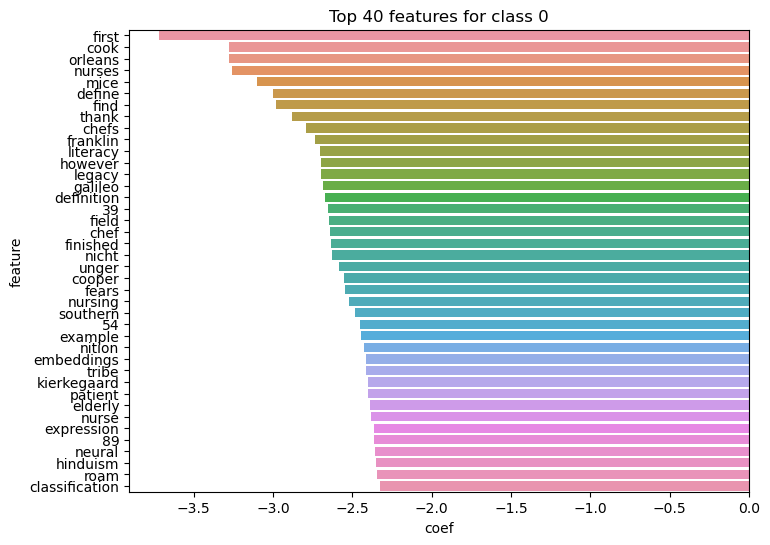

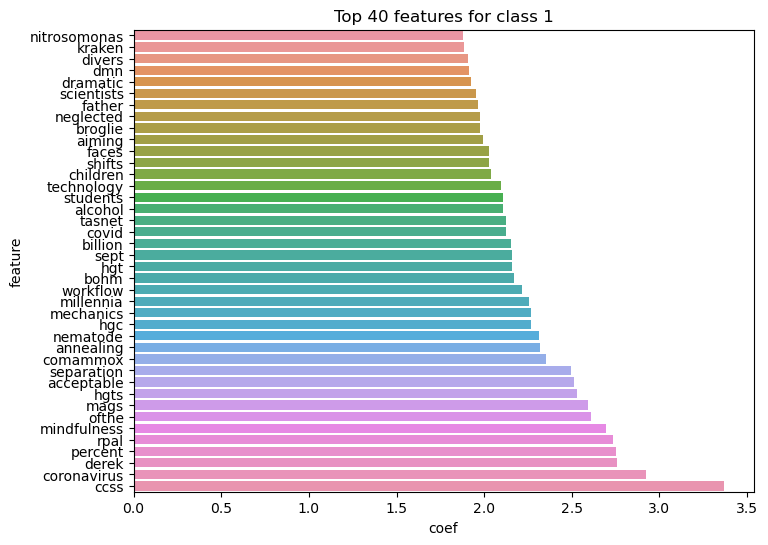

In [36]:
# Now call the feature visualization function
plot_top_features(pipeline, class_labels=class_labels, top_n=40)

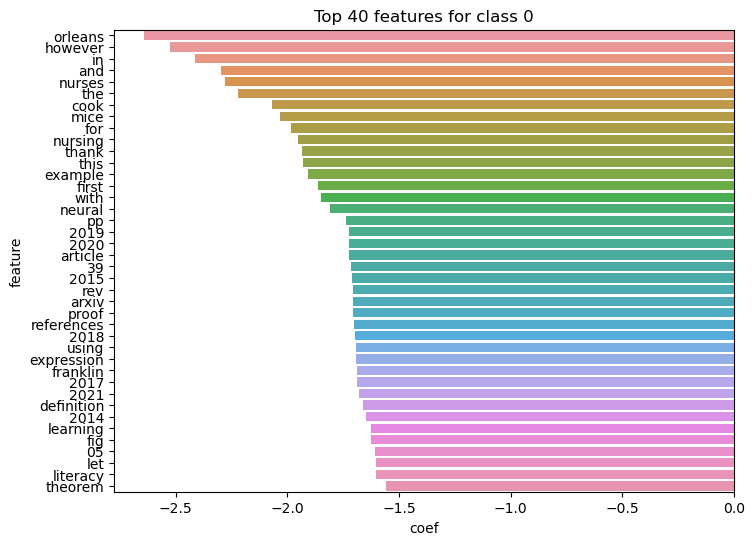

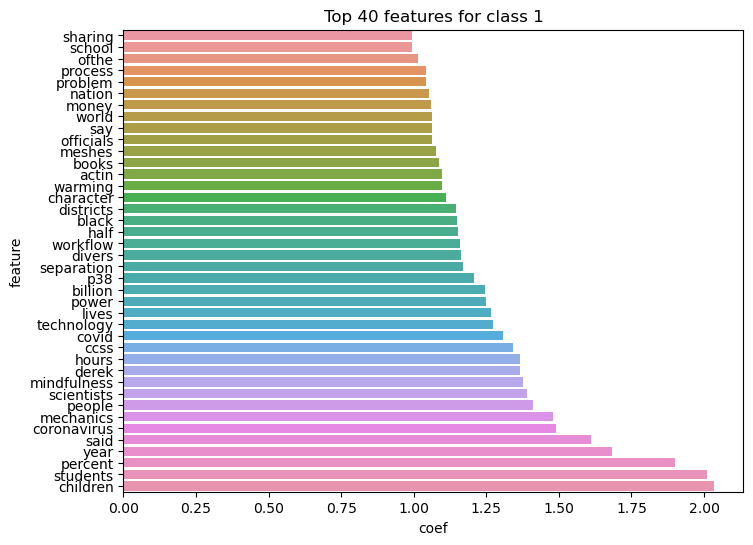

In [31]:
# Now call the feature visualization function
plot_top_features(pipeline_svm_sgd, class_labels=class_labels, top_n=40)

### Occurance Analysis

In [37]:
for word in ['ccss', 'ofthe', 'rpal', 'hgc', 'commamox', 'derek', '89', '54', 'classification', 'dmn', 'sept']:
    count_train = sum(X_train.str.contains(r'\b' + word + r'\b'))
    count_test = sum(X_test.str.contains(r'\b' + word + r'\b'))
    print(f"The word {word} appears {count_train} times in the training data and {count_test} times in the testing data")


The word ccss appears 0 times in the training data and 0 times in the testing data
The word ofthe appears 21 times in the training data and 4 times in the testing data
The word rpal appears 0 times in the training data and 0 times in the testing data
The word hgc appears 6 times in the training data and 0 times in the testing data
The word commamox appears 0 times in the training data and 0 times in the testing data
The word derek appears 0 times in the training data and 0 times in the testing data
The word 89 appears 43 times in the training data and 9 times in the testing data
The word 54 appears 72 times in the training data and 11 times in the testing data
The word classification appears 58 times in the training data and 11 times in the testing data
The word dmn appears 0 times in the training data and 0 times in the testing data
The word sept appears 0 times in the training data and 0 times in the testing data


### Label Analysis

In [38]:
for word in ['ccss', 'ofthe', 'rpal', 'hgc', 'commamox', 'derek', '89', '54', 'classification', 'dmn', 'sept']:
    print(f"For the feature {word}:")
    print("In the training data:")
    print(y_train[X_train.str.contains(r'\b' + word + r'\b')].value_counts())
    print("In the testing data:")
    print(y_test[X_test.str.contains(r'\b' + word + r'\b')].value_counts())


For the feature ccss:
In the training data:
Series([], Name: label, dtype: int64)
In the testing data:
Series([], Name: label, dtype: int64)
For the feature ofthe:
In the training data:
1    20
0     1
Name: label, dtype: int64
In the testing data:
1    4
Name: label, dtype: int64
For the feature rpal:
In the training data:
Series([], Name: label, dtype: int64)
In the testing data:
Series([], Name: label, dtype: int64)
For the feature hgc:
In the training data:
1    6
Name: label, dtype: int64
In the testing data:
Series([], Name: label, dtype: int64)
For the feature commamox:
In the training data:
Series([], Name: label, dtype: int64)
In the testing data:
Series([], Name: label, dtype: int64)
For the feature derek:
In the training data:
Series([], Name: label, dtype: int64)
In the testing data:
Series([], Name: label, dtype: int64)
For the feature 89:
In the training data:
0    39
1     4
Name: label, dtype: int64
In the testing data:
0    7
1    2
Name: label, dtype: int64
For the fe

### Context Analysis

In [115]:
testing_pdf_snippets = []

for word in ['ofthe']:
    print(f"Examples of snippets with the feature {word}:")
    testing_pdf_snippets.append(X_test[X_test.str.contains(r'\b' + word + r'\b')])
    print(X_train[X_train.str.contains(r'\b' + word + r'\b')][:25])

Examples of snippets with the feature ofthe:
22528    Giv en two TQFTsT,T′∈\n|2TQFTK|, thenthe componentsof the naturaltransformation θmust be — bythe\ndeﬁnitionabove—ofthe form\nθn:V⊗V⊗...⊗V/bracehtipupleft/bracehtipdownright/bracehtipdownleft/bracehtipupright\nntimes→W⊗W⊗...⊗W/bracehtipupleft/bracehtipdownright/bracehtipdownleft/bracehtipupright\nntimes.                                                                                     
32533    Panel A shows that editor*female fixed effects explain a substantive portion ofthe variation in changes in uncertainty, and that collectively, the fixed effects are statisticallydifferent from zero.                                                                                                                                                                                               
32568     In all cases, the output ofthis stage is a set of four 3D points representing the center ofthe holes in the target, in local coordinates           

In [119]:
import re

def clean_data(text):
    # replace multiple spaces or newlines with a single space
    text = re.sub('\s+', ' ', text)

    # remove non-alphanumeric characters, preserving some punctuations and spaces
    text = re.sub('[^a-zA-Z0-9\s,.]', '', text)
    
    # correct words that have been incorrectly merged
    # a space is added between a lowercase letter immediately followed by an uppercase letter
    text = re.sub(r'(\b\w+)([A-Z])', r'\1 \2', text)
    
    # replacing "ofthe" kind of merges with "of the"
    text = re.sub(r'ofthe', 'of the', text)
    
    # correct words that have been incorrectly split
    text = re.sub('Giv en', 'Given', text)
    
    return text


In [124]:
testing_pdf_snippets

[8518     Secondly,to  ensure  that  we  can  sample  from  any  point  ofthe latent space and still generate valid and diverseoutputs,  the  posteriorq(zjx)is  regularized  withits KL divergence from a prior distributionp(z)
 8987     For  the  purpose  of  training  a  hatespeech detection system, the reliability ofthe annotations is crucial, but there is nouniversally  agreed-upon  definition.                                                    
 10568    The properties ofthe latent space                                                                                                                                                                                      
 11410    Environments are keptonly if they are not too hard for all of the agents in the population, or are not too easy for any ofthe agents.                                                                                  
 Name: snippet, dtype: object]

In [125]:
testing_raw = ['Giv en two TQFTsT,T′∈\n|2TQFTK|, thenthe componentsof the naturaltransformation θmust be — bythe\ndeﬁnitionabove—ofthe form\nθn:V⊗V⊗.', 'less than half ofthe coordinates have a common word in all their descriptions,and two pairs of coordinates have the same most commonword.' ]

In [126]:
# clean every entry 


cleaned_testing = [clean_data(entry) for entry in testing_raw]

In [128]:
import nltk
from nltk.corpus import words

# Download the words corpus if it's not already downloaded
nltk.download('words')

word_list = set(words.words())  # A list of common English words

def split_words(text):
    new_text = ""
    for word in text.split():
        # If the word is in the dictionary, no need to split it
        if word in word_list:
            new_text += word + " "
        else:
            # Try to split the word
            for i in range(1, len(word)):
                if word[:i] in word_list and word[i:] in word_list:
                    new_text += word[:i] + " " + word[i:] + " "
                    break
            else:
                new_text += word + " "
    return new_text

# Apply the function to your data
cleaned_data = [split_words(text) for text in cleaned_testing]


[nltk_data] Downloading package words to
[nltk_data]     /Users/janfrommann/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [130]:
cleaned_testing

['Given two TQFTs T,T 2TQFT K, thenthe componentsof the naturaltransformation must be  bythe denitionaboveof the form nV V.',
 'less than half of the coordinates have a common word in all their descriptions,and two pairs of coordinates have the same most commonword.']

In [129]:
cleaned_data

['Given two TQFTs T,T 2TQFT K, then the componentsof the natural transformation must be by the denitionaboveof the form n V V. ',
 'less than half of the coordinates have a common word in all their descriptions,and two pair s of coordinates have the same most commonword. ']

In [39]:
for word in ['ccss', 'ofthe', 'rpal', 'hgc', 'commamox', 'derek', '89', '54', 'classification', 'dmn', 'sept']:
    print(f"Examples of snippets with the feature {word}:")
    print(X_train[X_train.str.contains(r'\b' + word + r'\b')][:5])


Examples of snippets with the feature ccss:
Series([], Name: snippet, dtype: object)
Examples of snippets with the feature ofthe:
22528    Giv en two TQFTsT,T′∈\n|2TQFTK|, thenthe compo...
32533    Panel A shows that editor*female fixed effects...
32568     In all cases, the output ofthis stage is a se...
34487    The predicted speech signal is re-constructed ...
34900    One ofthe most promising methods for multitask...
Name: snippet, dtype: object
Examples of snippets with the feature rpal:
Series([], Name: snippet, dtype: object)
Examples of snippets with the feature hgc:
33804    (2022) and another containing several novel hg...
35064    We mapped the presence/absence of merB and hgc...
35387    (2022) and another containing several novel hg...
40251    (2022) and another containing several novel hg...
42674    We mapped the presence/absence of merB and hgc...
Name: snippet, dtype: object
Examples of snippets with the feature commamox:
Series([], Name: snippet, dtype: object)
Examp

In [42]:
# convert to lower case
X_train_lower = X_train.str.lower()

# removing special characters
X_train_cleaned = X_train_lower.str.replace('[^a-zA-Z0-9 ]', ' ')

for word in ['ccss', 'ofthe', 'rpal', 'hgc', 'comammox', 'derek', '89', '54', 'classification', 'dmn', 'sept']:
    count_train = sum(X_train_cleaned.str.contains(r'\b' + word.lower() + r'\b'))
    print(f"The word {word} appears {count_train} times in the training data")


/var/folders/8j/522cg_sx50v8wj687685j9tr0000gn/T/ipykernel_18085/607723084.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_cleaned = X_train_lower.str.replace('[^a-zA-Z0-9 ]', ' ')


The word ccss appears 26 times in the training data
The word ofthe appears 21 times in the training data
The word rpal appears 8 times in the training data
The word hgc appears 6 times in the training data
The word comammox appears 10 times in the training data
The word derek appears 50 times in the training data
The word 89 appears 43 times in the training data
The word 54 appears 72 times in the training data
The word classification appears 61 times in the training data
The word dmn appears 8 times in the training data
The word sept appears 13 times in the training data


In [47]:
pd.set_option('display.max_colwidth', -1)

for word in ['ccss', 'ofthe', 'rpal', 'hgc', 'comammox', 'derek', '89', '54', 'classification', 'dmn', 'sept']:
    print(f"Examples of snippets with the feature {word}:")
    print(X_train_cleaned[X_train_cleaned.str.contains(r'\b' + word + r'\b')][:5])


/var/folders/8j/522cg_sx50v8wj687685j9tr0000gn/T/ipykernel_18085/2255216034.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Examples of snippets with the feature ccss:
26785    of 171 texts recommended for elementary children in appendix b of the ccss  there are only 18 by authors of color  and few books reflect the lives of children of color and the poor 
27849    of 171 texts recommended for elementary children in appendix b of the ccss  there are only 18 by authors of color  and few books reflect the lives of children of color and the poor 
27976    of 171 texts recommended for elementary children in appendix b of the ccss  there are only 18 by authors of color  and few books reflect the lives of children of color and the poor 
28343    when the common core state standards  ccss  were introduced in 2009 2010   the literacy needs of half the children in the united states were neglected                               
30236    when the ccss were open for public comment in 2010  i  gangi  made that criticism on the ccss website                                                                                
N

In [51]:
# open the json filed df_all_combined_processed2.json', orient='index'

df_combined_p_stage = pd.read_json('df_all_combined_processed2.json', orient='index')


In [58]:
print(df_combined_p_stage.iloc[4]['html'][0])

arXiv:1409.2752v2  [cs.LG]  7 Jun 2015Winner-Take-AllAutoencoders
AlirezaMakhzani,Brendan Frey
UniversityofToronto
makhzani, frey@psi.toronto.edu
Abstract
Inthispaper,weproposeawinner-take-allmethodforlearn inghierarchicalsparse
representations in an unsupervised fashion. We ﬁrst introd uce fully-connected
winner-take-allautoencoderswhich use mini-batchstatis tics to directly enforcea
lifetimesparsityintheactivationsofthehiddenunits. We thenproposetheconvo-
lutionalwinner-take-allautoencoderwhichcombinestheb eneﬁtsofconvolutional
architecturesand autoencodersfor learningshift-invari antsparse representations.
We describe a way to train convolutional autoencoders layer by layer, where in
additiontolifetimesparsity,aspatialsparsitywithinea chfeaturemapisachieved
using winner-take-all activation functions. We will show t hat winner-take-all au-
toencoders can be used to to learn deep sparse representatio ns from the MNIST,
CIFAR-10, ImageNet, Street View House Numbers and Toronto F ace da

In [61]:
def clean_lower_df(df):

    # Convert lists in 'match' and 'html' to strings and convert to lower case
    df['match_str'] = df['match'].apply(lambda x: ' '.join(map(str, x))).str.lower()
    df['html_str'] = df['html'].apply(lambda x: ' '.join(map(str, x)) if isinstance(x, list) else x).str.lower()

    # Remove special characters
    df['match_cleaned'] = df['match_str'].str.replace('[^a-zA-Z0-9 ]', ' ')
    df['html_cleaned'] = df['html_str'].str.replace('[^a-zA-Z0-9 ]', ' ')

    return df




In [62]:
df_combined_p_stage = clean_lower_df(df_combined_p_stage)

/var/folders/8j/522cg_sx50v8wj687685j9tr0000gn/T/ipykernel_18085/1850702700.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['match_cleaned'] = df['match_str'].str.replace('[^a-zA-Z0-9 ]', ' ')
/var/folders/8j/522cg_sx50v8wj687685j9tr0000gn/T/ipykernel_18085/1850702700.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['html_cleaned'] = df['html_str'].str.replace('[^a-zA-Z0-9 ]', ' ')


In [64]:
def search_string(df, search_str):
    # Search in 'match' and 'html' columns
    condition = df['match_cleaned'].str.contains(search_str, case=False, na=False) | df['html_cleaned'].str.contains(search_str, case=False, na=False)
    
    # Get the rows where the string is found
    matching_rows = df[condition]
    
    # If matching rows exist, print 'uri' and 'url'
    if not matching_rows.empty:
        for _, row in matching_rows.iterrows():
            print(f"Found string '{search_str}' in 'match' or 'html'. Corresponding 'uri': {row['uri']}, 'url': {row['url']}")
    else:
        print(f"String '{search_str}' not found in 'match' or 'html'.")

In [112]:
search_string(df_combined_p_stage, "writers at the")

Found string 'writers at the' in 'match' or 'html'. Corresponding 'uri': https://en.wikipedia.org/wiki/Orson_Scott_Card, 'url': None
